# Module 03

## Session 09 Unsupervised Learning

## PCA

Dataset Description
* dataset: Breast Cancer
* features: 30 features extracted from images
* you can't see the hidden structure in the data easily using data visualization
* if you use scatter plot, this dataset has 30 features, which would result in 30*14=420 scatter plots

Task:
* scale the features using standard scaler
* compute how much information extracted using two components
* reduce the dimension from 30 to 2 using two components
* plot the first components and the second components
    - x axis frist component
    - y axis second component
    - hue: diagnosis

# Library

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data

In [3]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

# Preprocess

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)

In [7]:
X_scaled.shape

(569, 30)

# PCA

In [8]:
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_scaled)

In [12]:
two_pca = pd.DataFrame(X_pca)[[0,1]]
two_pca

,0,1
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [13]:
variance = []

for i in range(0,30):
    variance.append(np.var(X_pca[:,i]))

In [17]:
(np.sum(variance[:2])/np.sum(variance))*100

63.24320765155943

# Analyze

Text(0, 0.5, 'second component')

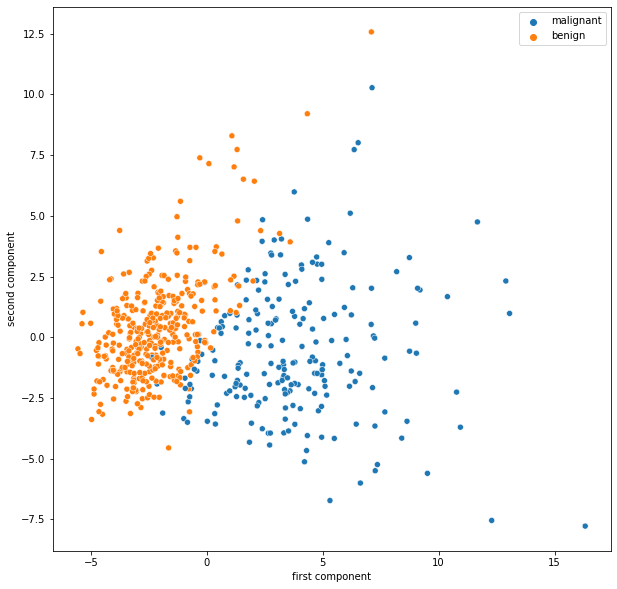

In [22]:
plt.figure(figsize=(10,10))

sns.scatterplot(
    x=two_pca[0],
    y=two_pca[1],
    hue=np.where(cancer.target, 'benign', 'malignant')
)
plt.xlabel('first component')
plt.ylabel('second component')

# Interpretation

1. both component represent 63.24% of all features
2. both component separated the benign and malignant
3. there is hidden structure
4. malignant have higher characteristic variance